In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [28]:
df = pd.read_csv("/kaggle/input/employees-payroll-in-los-angeles/train-test-payroll.csv",low_memory=False)
df_raw = df.copy()

In [29]:
df.head()

,REGULAR_PAY,PAY_YEAR,DEPARTMENT_NO,JOB_CLASS_PGRADE,JOB_TITLE,OVERTIME_PAY,ALL_OTHER_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY,GENDER,ETHNICITY
0,55725.24,2017,98,3156,0,4785.05,2021.84,3678.0,23508.9,0,0
1,139174.88,2017,98,9105,1,16340.50,6170.49,9186.0,23508.9,0,1
2,245879.12,2017,98,9602,2,0.00,12504.30,16228.0,23508.9,1,2
3,101494.34,2017,98,5885,3,7824.99,12630.52,6699.0,23508.9,1,1
4,101345.12,2017,98,3841,4,22284.37,1566.75,6689.0,23508.9,1,0


In [30]:
df.describe()

,REGULAR_PAY,PAY_YEAR,DEPARTMENT_NO,JOB_CLASS_PGRADE,JOB_TITLE,OVERTIME_PAY,ALL_OTHER_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY,GENDER,ETHNICITY
count,336539.000000,336539.000000,336539.000000,336539.00000,336539.000000,336539.000000,3.365390e+05,336539.000000,336539.000000,336539.000000,336539.000000
mean,83867.947440,2018.189598,67.144236,3301.92635,406.900422,13425.436662,5.365369e+03,23968.574407,13637.585906,0.732813,2.171086
std,38335.586522,2.712597,29.245627,2118.61935,357.019840,23660.621132,9.987850e+03,19194.292105,6851.135324,0.442512,2.355145
min,0.000000,2013.000000,2.000000,1.00000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,57994.520000,2016.000000,42.000000,2112.00000,186.000000,0.000000,1.269695e+03,7213.405000,8262.240000,0.000000,0.000000
50%,83458.680000,2019.000000,70.000000,2227.00000,354.000000,3624.680000,2.785060e+03,19780.870000,15282.500000,1.000000,2.000000
75%,108923.400000,2020.000000,98.000000,3828.00000,490.000000,16469.530000,6.356505e+03,36683.775000,18495.320000,1.000000,3.000000
max,434340.640000,2022.000000,98.000000,9998.00000,1757.000000,434393.940000,2.394972e+06,164256.850000,58786.030000,2.000000,14.000000


In [31]:
df['PAY_YEAR'].unique().tolist()
# value_counts()

[2017, 2022, 2016, 2020, 2021, 2014, 2018, 2019, 2013, 2015]

In [32]:
df.columns

Index(['REGULAR_PAY', 'PAY_YEAR', 'DEPARTMENT_NO', 'JOB_CLASS_PGRADE',
       'JOB_TITLE', 'OVERTIME_PAY', 'ALL_OTHER_PAY',
       'CITY_RETIREMENT_CONTRIBUTIONS', 'BENEFIT_PAY', 'GENDER', 'ETHNICITY'],
      dtype='object')

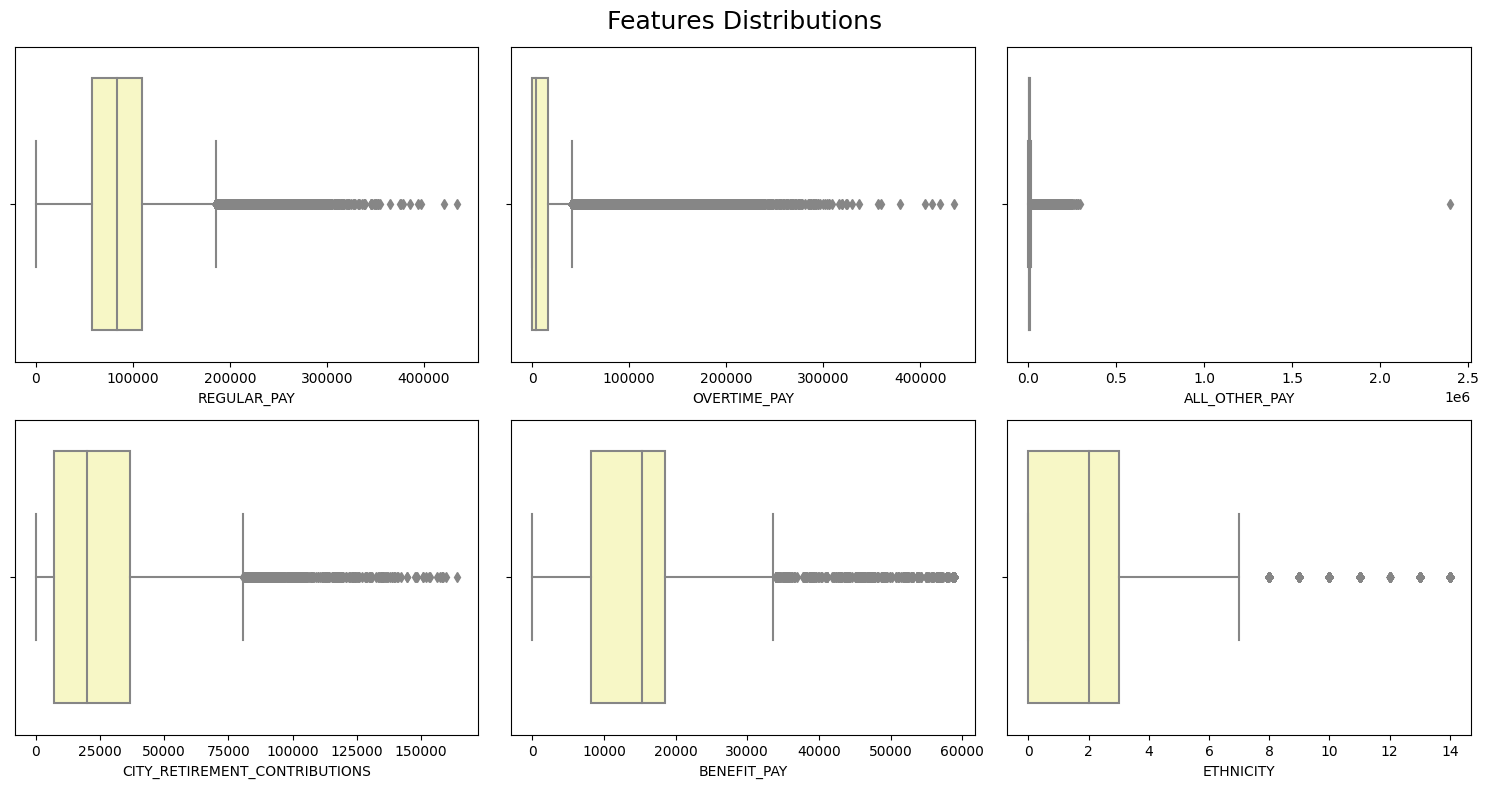

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(15,8))
fig.suptitle('Features Distributions', size = 18)

sns.boxplot(ax=axes[0, 0], data=df, x='REGULAR_PAY', palette='Spectral')
# axes[0,0].set_title("REGULAR_PAY");

sns.boxplot(ax=axes[0, 1], data=df, x='OVERTIME_PAY', palette='Spectral')
# axes[0,1].set_title("OVERTIME_PAY");

sns.boxplot(ax=axes[0, 2], data=df, x='ALL_OTHER_PAY', palette='Spectral')
# axes[0,2].set_title("ALL_OTHER_PAY");

sns.boxplot(ax=axes[1, 0], data=df, x='CITY_RETIREMENT_CONTRIBUTIONS', palette='Spectral')
# axes[1,0].set_title("CITY_RETIREMENT_CONTRIBUTIONS");

sns.boxplot(ax=axes[1, 1], data=df, x='BENEFIT_PAY', palette='Spectral')
# axes[1,1].set_title("BENEFIT_PAY");

sns.boxplot(ax=axes[1, 2], data=df, x='ETHNICITY', palette='Spectral')

plt.tight_layout()

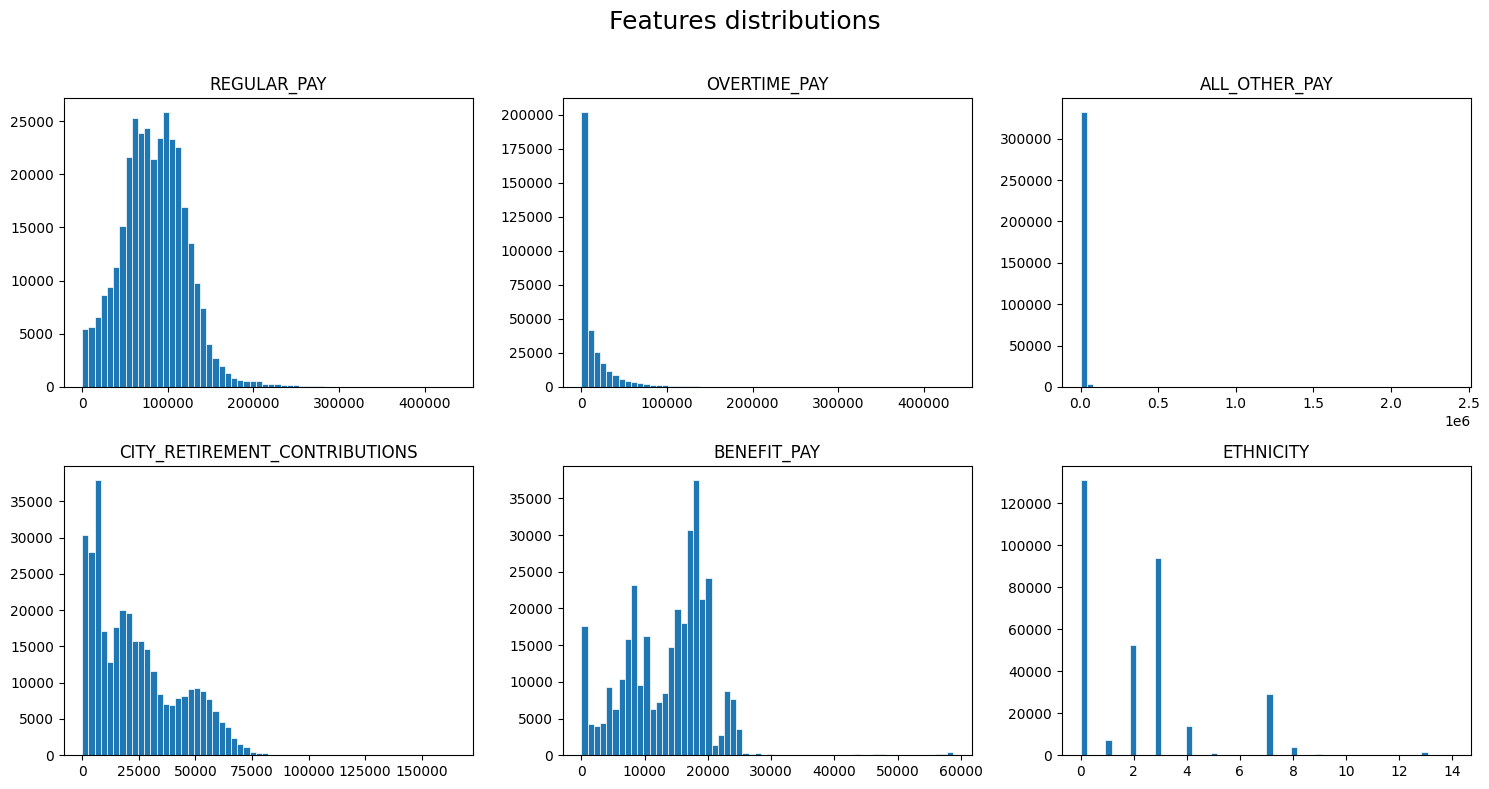

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(15,8))
fig.suptitle('Features distributions\n', size = 18)

axes[0,0].hist(df['REGULAR_PAY'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("REGULAR_PAY");

axes[0,1].hist(df['OVERTIME_PAY'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("OVERTIME_PAY");

axes[0,2].hist(df['ALL_OTHER_PAY'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("ALL_OTHER_PAY");

axes[1,0].hist(df['CITY_RETIREMENT_CONTRIBUTIONS'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("CITY_RETIREMENT_CONTRIBUTIONS");

axes[1,1].hist(df['BENEFIT_PAY'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("BENEFIT_PAY");

axes[1,2].hist(df['ETHNICITY'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("ETHNICITY");

plt.tight_layout()

In [50]:
model = IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.5), max_features=1.0)
model.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.5, n_estimators=150)

In [51]:
scores=model.decision_function(df)
anomaly=model.predict(df)

df['SCORES']=scores
df['ANOMALY']=anomaly

df.head(10)

,REGULAR_PAY,PAY_YEAR,DEPARTMENT_NO,JOB_CLASS_PGRADE,JOB_TITLE,OVERTIME_PAY,ALL_OTHER_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY,GENDER,ETHNICITY,SCORES,ANOMALY
0,55725.24,2017,98,3156,0,4785.05,2021.84,3678.0,23508.90,0,0,-0.012994,-1
1,139174.88,2017,98,9105,1,16340.50,6170.49,9186.0,23508.90,0,1,-0.127230,-1
2,245879.12,2017,98,9602,2,0.00,12504.30,16228.0,23508.90,1,2,-0.157735,-1
3,101494.34,2017,98,5885,3,7824.99,12630.52,6699.0,23508.90,1,1,0.013250,1
4,101345.12,2017,98,3841,4,22284.37,1566.75,6689.0,23508.90,1,0,0.032403,1
5,90388.98,2017,98,1693,5,0.00,5774.99,5966.0,9250.61,1,0,0.033440,1
6,76555.48,2017,98,3115,6,23924.47,13193.40,5053.0,15936.82,1,0,0.029295,1
7,149656.00,2017,98,1728,7,917.36,6842.64,9877.0,25704.27,1,2,-0.009419,-1
8,86779.20,2017,98,7525,8,34793.28,4444.81,0.0,8191.86,1,3,-0.012506,-1
9,80843.20,2017,98,1600,9,22266.72,1019.32,5336.0,22552.95,1,0,0.025983,1


In [52]:
anomaly = df.loc[df['ANOMALY']==-1]
anomaly_index = list(anomaly.index)
print('Total number of outliers is:', len(anomaly))

Total number of outliers is: 168269


In [53]:
df[df['ANOMALY']==-1].head(10)

,REGULAR_PAY,PAY_YEAR,DEPARTMENT_NO,JOB_CLASS_PGRADE,JOB_TITLE,OVERTIME_PAY,ALL_OTHER_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY,GENDER,ETHNICITY,SCORES,ANOMALY
0,55725.24,2017,98,3156,0,4785.05,2021.84,3678.0,23508.90,0,0,-0.012994,-1
1,139174.88,2017,98,9105,1,16340.50,6170.49,9186.0,23508.90,0,1,-0.127230,-1
2,245879.12,2017,98,9602,2,0.00,12504.30,16228.0,23508.90,1,2,-0.157735,-1
7,149656.00,2017,98,1728,7,917.36,6842.64,9877.0,25704.27,1,2,-0.009419,-1
8,86779.20,2017,98,7525,8,34793.28,4444.81,0.0,8191.86,1,3,-0.012506,-1
11,23560.64,2017,98,7228,11,697.56,140.00,0.0,5911.05,1,3,-0.011899,-1
12,101291.75,2017,98,1521,12,0.00,3972.00,6685.0,23508.90,0,1,-0.012597,-1
15,104269.52,2017,98,9184,15,4505.80,4056.00,6882.0,10589.27,0,0,-0.061620,-1
16,148267.96,2017,98,7539,16,16022.65,6142.58,9786.0,22552.95,1,2,-0.004623,-1
18,87519.54,2017,98,3711,18,45534.31,12663.33,5776.0,45611.28,1,0,-0.020067,-1


In [54]:
# dropping outliers
df_out = df.drop(anomaly_index, axis = 0).reset_index(drop=True)

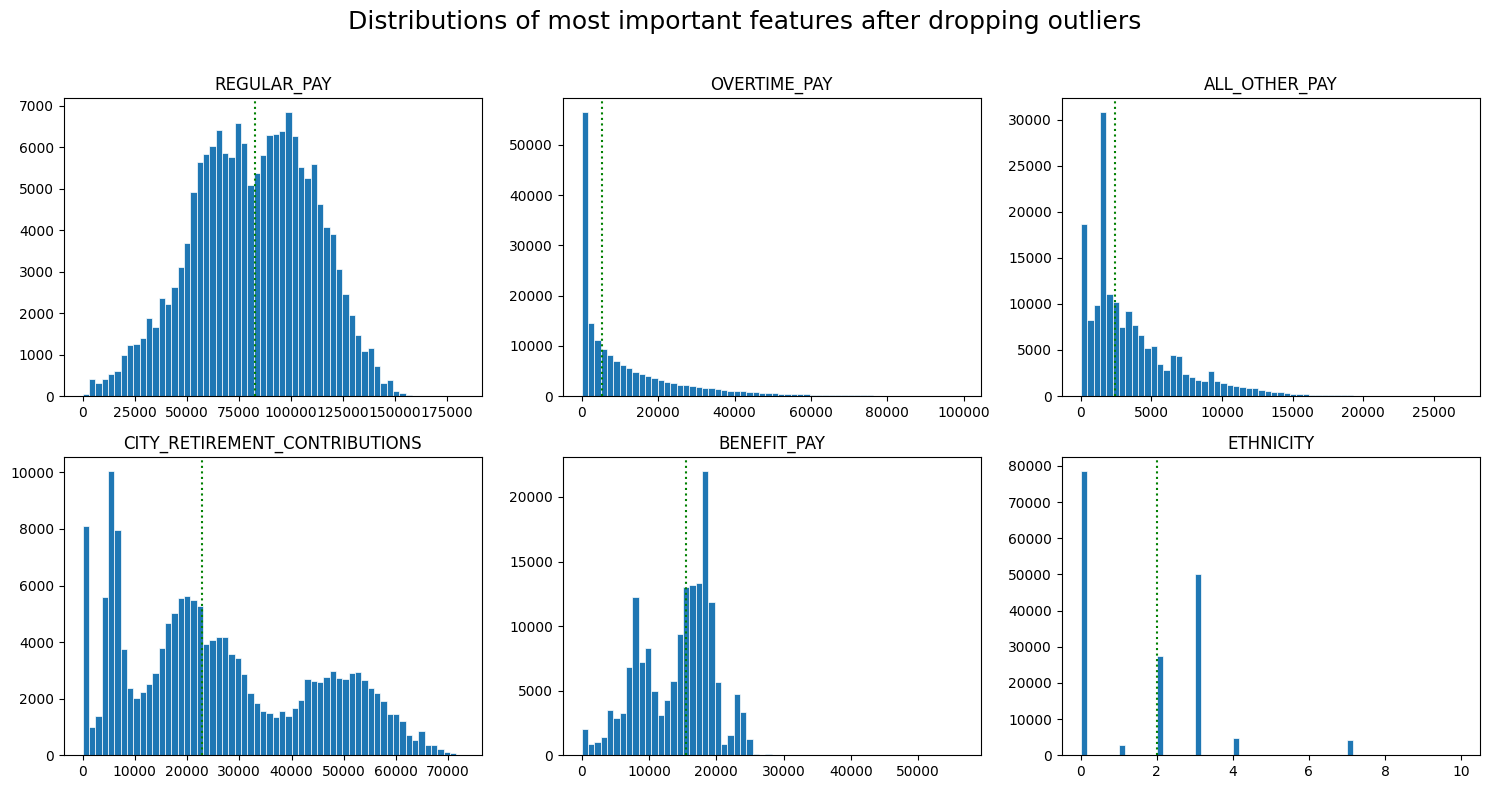

In [55]:
# Checking distributions of most important features after dropping outliers

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(15,8))
fig.suptitle('Distributions of most important features after dropping outliers\n', size = 18)

axes[0,0].hist(df_out['REGULAR_PAY'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].axvline(np.median(df_out['REGULAR_PAY']), ls=':', c='g', label="Median")
axes[0,0].set_title("REGULAR_PAY");

axes[0,1].hist(df_out['OVERTIME_PAY'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].axvline(np.median(df_out['OVERTIME_PAY']), ls=':', c='g', label="Median")
axes[0,1].set_title("OVERTIME_PAY");

axes[0,2].hist(df_out['ALL_OTHER_PAY'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].axvline(np.median(df_out['ALL_OTHER_PAY']), ls=':', c='g', label="Median")
axes[0,2].set_title("ALL_OTHER_PAY");

axes[1,0].hist(df_out['CITY_RETIREMENT_CONTRIBUTIONS'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].axvline(np.median(df_out['CITY_RETIREMENT_CONTRIBUTIONS']), ls=':', c='g', label="Median")
axes[1,0].set_title("CITY_RETIREMENT_CONTRIBUTIONS");

axes[1,1].hist(df_out['BENEFIT_PAY'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].axvline(np.median(df_out['BENEFIT_PAY']), ls=':', c='g', label="Median")
axes[1,1].set_title("BENEFIT_PAY");

axes[1,2].hist(df_out['ETHNICITY'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].axvline(np.median(df_out['ETHNICITY']), ls=':', c='g', label="Median")
axes[1,2].set_title("ETHNICITY");

plt.tight_layout()

**Analyzing Outliers**

*Correlation Heatmap*

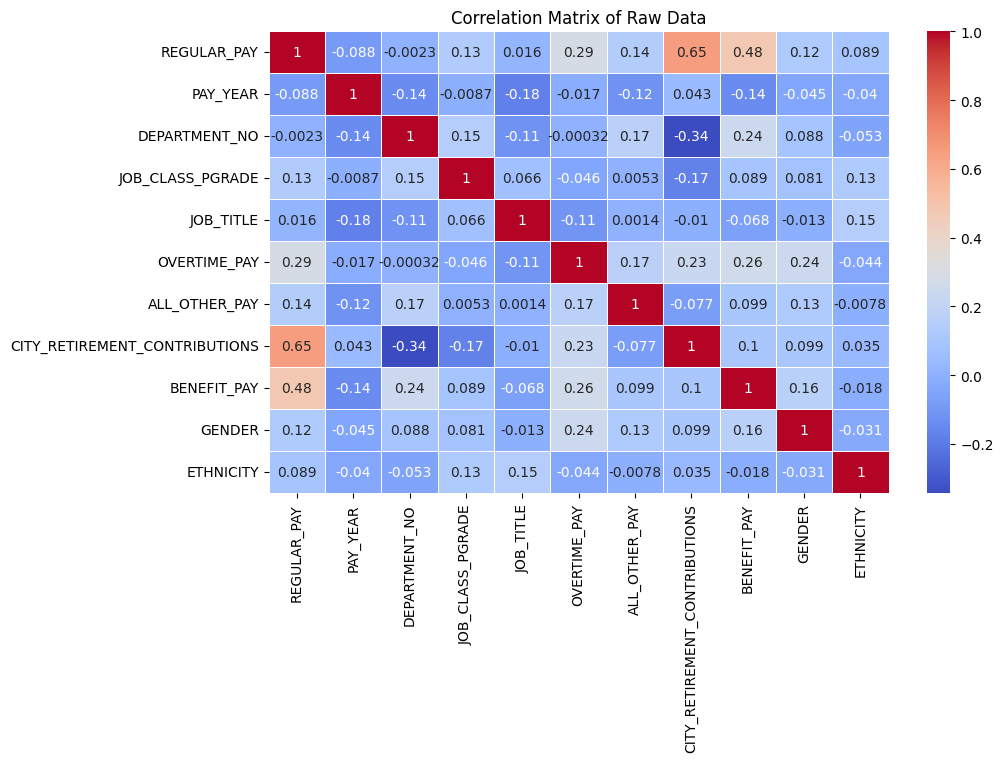

In [56]:
# Compute correlation matrix for outliers dataset
# df_out_raw = df.iloc[:,:-2]
corr_matrix = df_raw.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Raw Data")
plt.show()

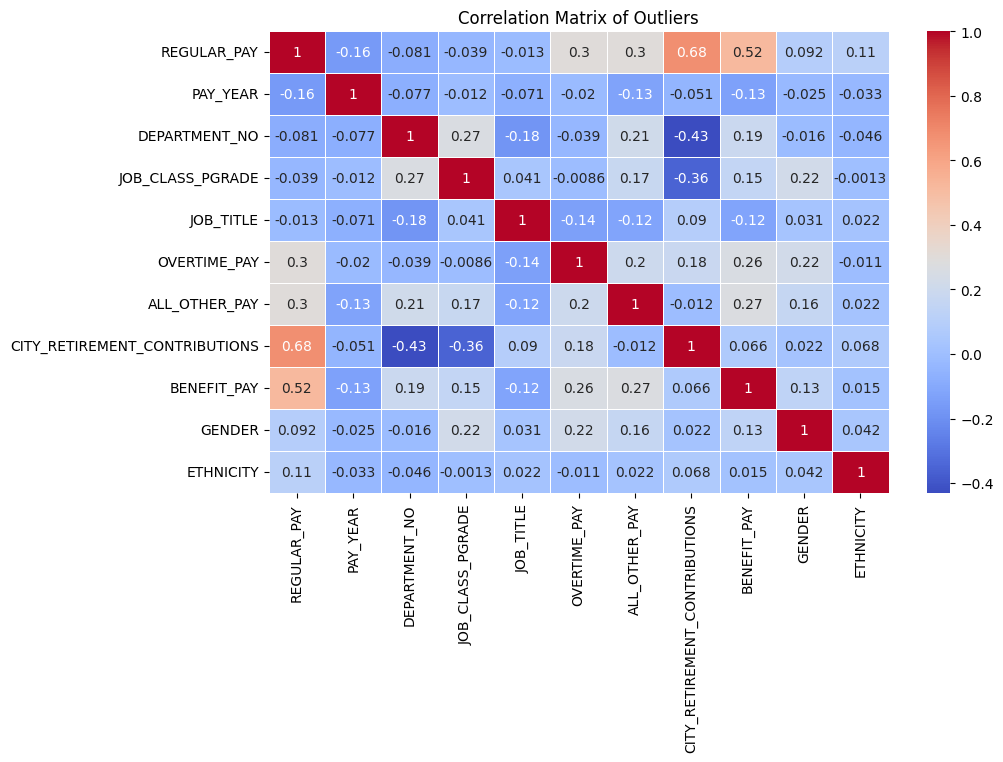

In [57]:
# Compute correlation matrix for outliers dataset
df_out_raw = df_out.iloc[:,:-2]
corr_matrix = df_out_raw.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Outliers")
plt.show()

***Visualizing Relationships Between Correlated Variables***

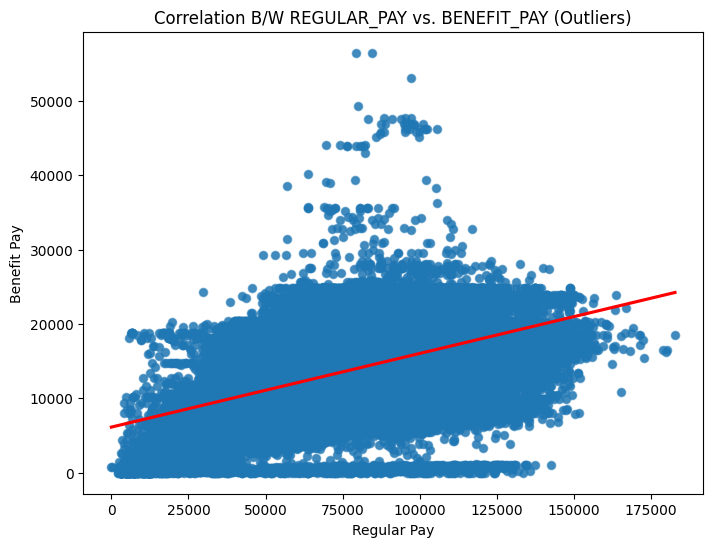

In [58]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_out_raw.loc[:,"REGULAR_PAY"], y=df_out_raw.loc[:,"BENEFIT_PAY"], alpha=0.7)
sns.regplot(x=df_out_raw.loc[:,"REGULAR_PAY"], y=df_out_raw.loc[:,"BENEFIT_PAY"], scatter_kws={"alpha":0.5}, line_kws={"color": "red"})
plt.title("Correlation B/W REGULAR_PAY vs. BENEFIT_PAY (Outliers)")
plt.xlabel("Regular Pay")
plt.ylabel("Benefit Pay")
plt.show()

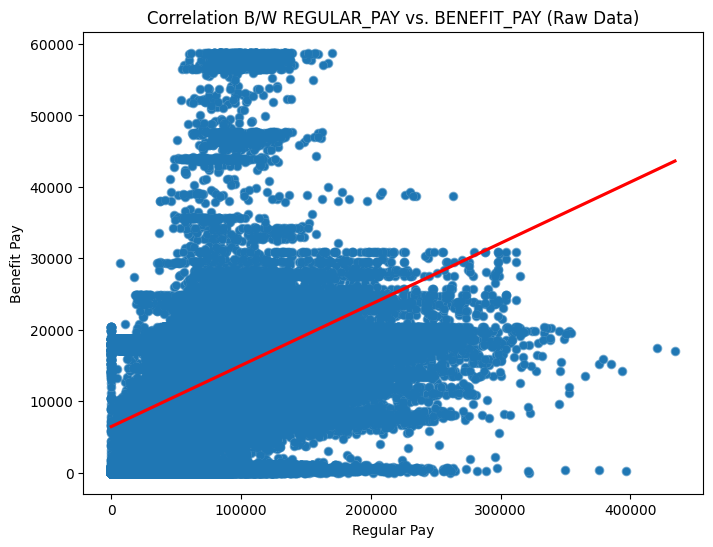

In [59]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_raw.loc[:,"REGULAR_PAY"], y=df_raw.loc[:,"BENEFIT_PAY"])
sns.regplot(x=df_raw.loc[:,"REGULAR_PAY"], y=df_raw.loc[:,"BENEFIT_PAY"], scatter_kws={"alpha":0.5}, line_kws={"color": "red"})
plt.title("Correlation B/W REGULAR_PAY vs. BENEFIT_PAY (Raw Data)")
plt.xlabel("Regular Pay")
plt.ylabel("Benefit Pay")
plt.show()

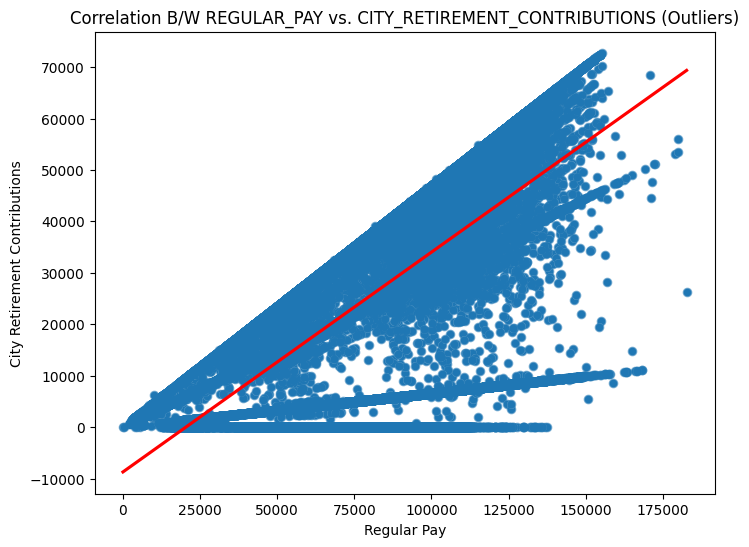

In [60]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_out_raw.loc[:,"REGULAR_PAY"], y=df_out_raw.loc[:,"CITY_RETIREMENT_CONTRIBUTIONS"])
sns.regplot(x=df_out_raw.loc[:,"REGULAR_PAY"], y=df_out_raw.loc[:,"CITY_RETIREMENT_CONTRIBUTIONS"], scatter_kws={"alpha":0.5}, line_kws={"color": "red"})
plt.title("Correlation B/W REGULAR_PAY vs. CITY_RETIREMENT_CONTRIBUTIONS (Outliers)")
plt.xlabel("Regular Pay")
plt.ylabel("City Retirement Contributions")
plt.show()

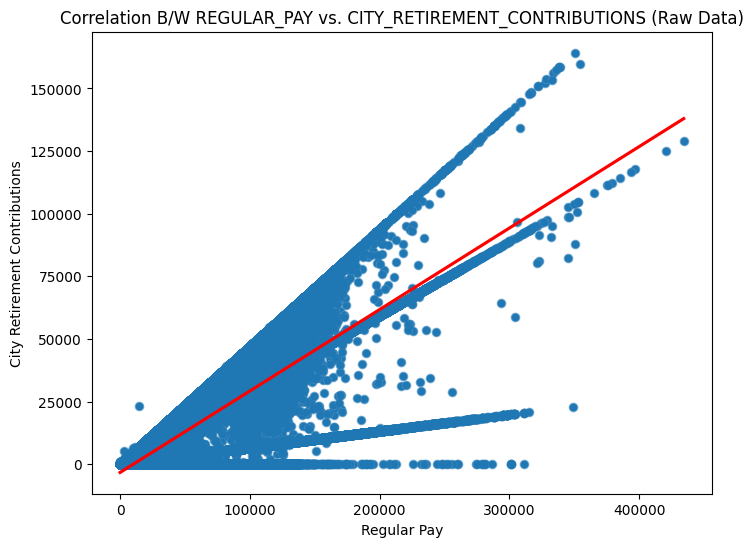

In [61]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_raw.loc[:,"REGULAR_PAY"], y=df_raw.loc[:,"CITY_RETIREMENT_CONTRIBUTIONS"])
sns.regplot(x=df_raw.loc[:,"REGULAR_PAY"], y=df_raw.loc[:,"CITY_RETIREMENT_CONTRIBUTIONS"], scatter_kws={"alpha":0.5}, line_kws={"color": "red"})
plt.title("Correlation B/W REGULAR_PAY vs. CITY_RETIREMENT_CONTRIBUTIONS (Raw Data)")
plt.xlabel("Regular Pay")
plt.ylabel("City Retirement Contributions")
plt.show()